In [3]:
using LinearAlgebra
using PyPlot
using DataFrames
using CSV

In [4]:
include("../src/tmat.jl")
include("../src/latt_para.jl")
include("../src/tmat_nlo.jl")

pole_NLO

In [5]:
hd = DataFrame(CSV.File("./hadron_decons_quark_dependence_sym.csv") )

Row,mpi,mK,meta,mN,mLam,mSig,mXi,fpi,fK,feta
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,131.0,493.0,552.165,961.286,1109.42,1181.62,1293.58,91.2267,109.903,118.965
2,202.0,484.0,537.139,1001.54,1127.7,1189.54,1284.74,95.5891,110.912,118.071
3,286.0,466.0,507.032,1062.2,1150.39,1193.67,1260.21,101.477,111.769,116.229
4,290.0,471.0,512.083,1066.45,1155.92,1199.95,1267.38,101.684,111.97,116.439
5,348.0,445.0,471.141,1115.24,1165.4,1190.0,1227.85,105.96,111.726,114.001
6,414.0,414.0,414.0,1178.4,1178.4,1178.4,1178.4,110.433,110.433,110.433
7,422.0,422.0,422.0,1188.89,1188.89,1188.89,1188.89,110.831,110.831,110.831


In [71]:
function params_set!(hd, index)
    mch = [(hd[!, :mpi][index], hd[!, :mSig][index]), (hd[!, :mK][index], hd[!, :mN][index])]
    params = Dict(
        :mch => mch,
        :decons_vec => [106.95, 106.95, 106.96, 106.95],#[92.4, 92.4, 92.4, 92.4] * 1.155,
        #:decons_vec => [hd[!, :fpi][index], hd[!, :fK][index]],
        :threshold => [sum(mch[i]) for i in 1:2]
    )
    return params
end
params1 = params_set!(hd, 4)

Dict{Symbol, Vector} with 3 entries:
  :threshold  => [1489.95, 1537.45]
  :decons_vec => [106.95, 106.95, 106.96, 106.95]
  :mch        => [(290.0, 1199.95), (471.0, 1066.45)]

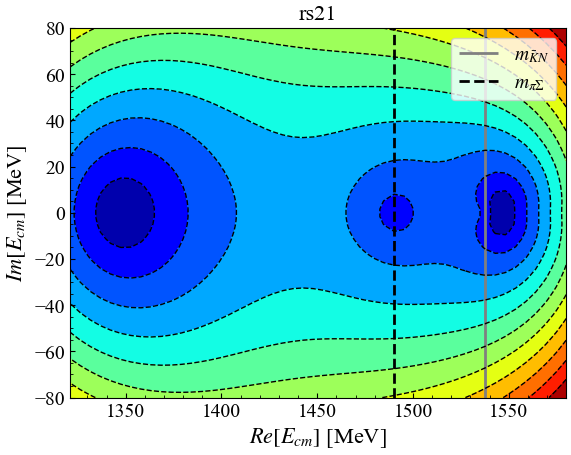

In [72]:
dim = 50
rew = range(1321, 1580, dim)
imw = range(-80, 80, dim)

fig, ax = PyPlot.subplots()
plot_tdet_LO!(ax, rew, imw, params1, [-1.95, -1.92], n=2)
gcf()